In [1]:
# Importing Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
# Importing CSV file
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [18]:
df.shape

(11239, 13)

In [17]:
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [19]:
df.tail(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188


In [3]:
# Dropping unrelated/blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [4]:
# Checking for null values
df.dropna(inplace=True)

In [5]:
# Changing data type
df['Amount'] = df['Amount'].astype('int')

In [6]:
# Renaming column
df.rename(columns={'Marital_Status': 'Shaadi'}, inplace=True)

# Exploratory Data Analysis

## Gender

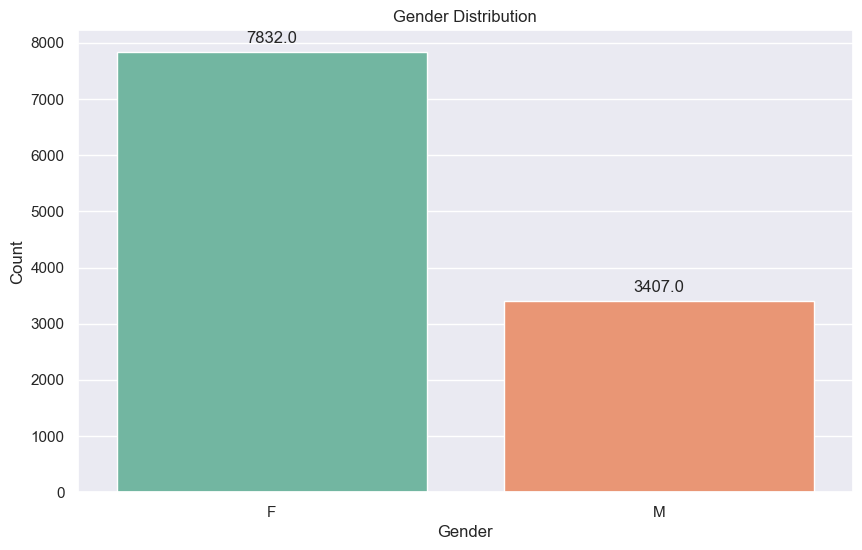

In [9]:
plt.figure(figsize=(10, 6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Gender', data=df, palette="Set2")
for bars in ax.patches:
    ax.annotate(f'{bars.get_height()}', (bars.get_x() + bars.get_width() / 2., bars.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Age

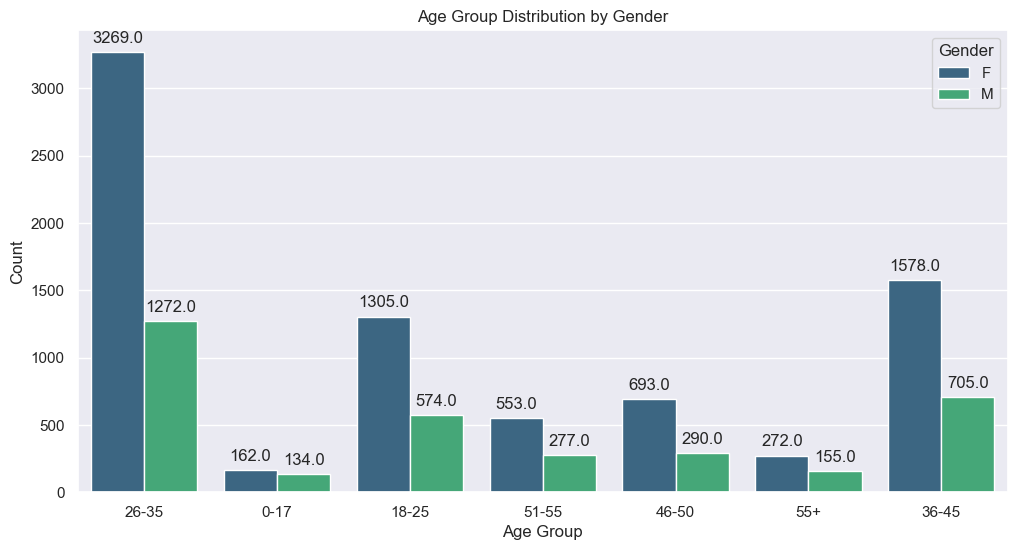

In [10]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Age Group', hue='Gender', palette="viridis")
for bars in ax.patches:
    ax.annotate(f'{bars.get_height()}', (bars.get_x() + bars.get_width() / 2., bars.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## State

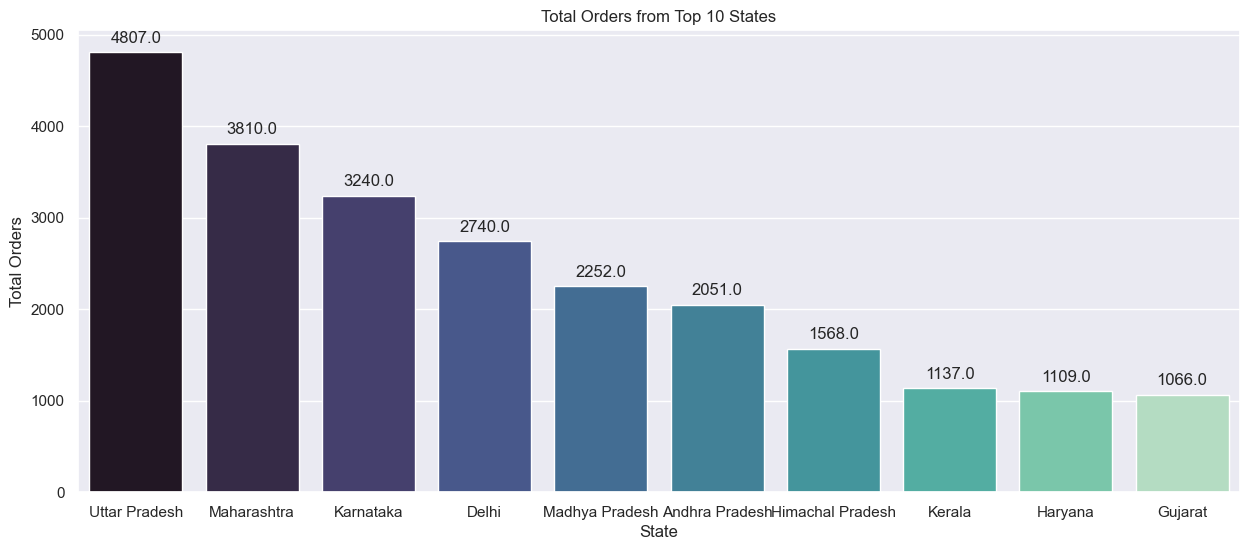

In [11]:
plt.figure(figsize=(15, 6))
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
ax = sns.barplot(data=sales_state, x='State', y='Orders', palette="mako")
for bars in ax.patches:
    ax.annotate(f'{bars.get_height()}', (bars.get_x() + bars.get_width() / 2., bars.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Total Orders from Top 10 States')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.show()


## Occupation

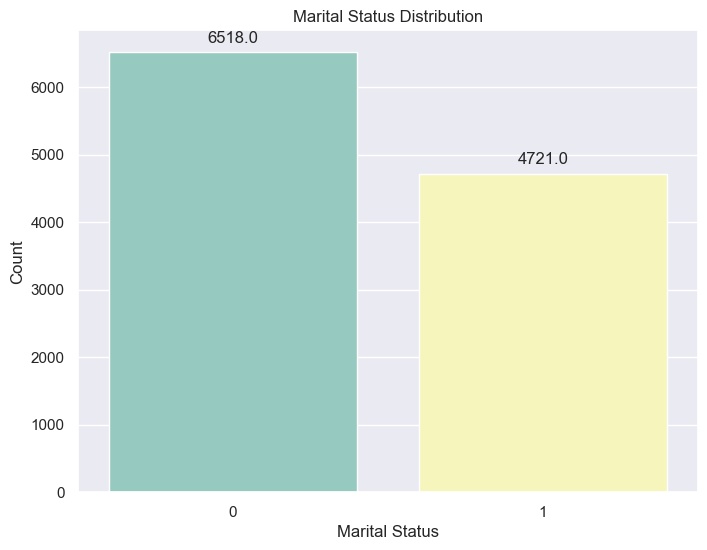

In [12]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Shaadi', palette="Set3")
for bars in ax.patches:
    ax.annotate(f'{bars.get_height()}', (bars.get_x() + bars.get_width() / 2., bars.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

## Product Category

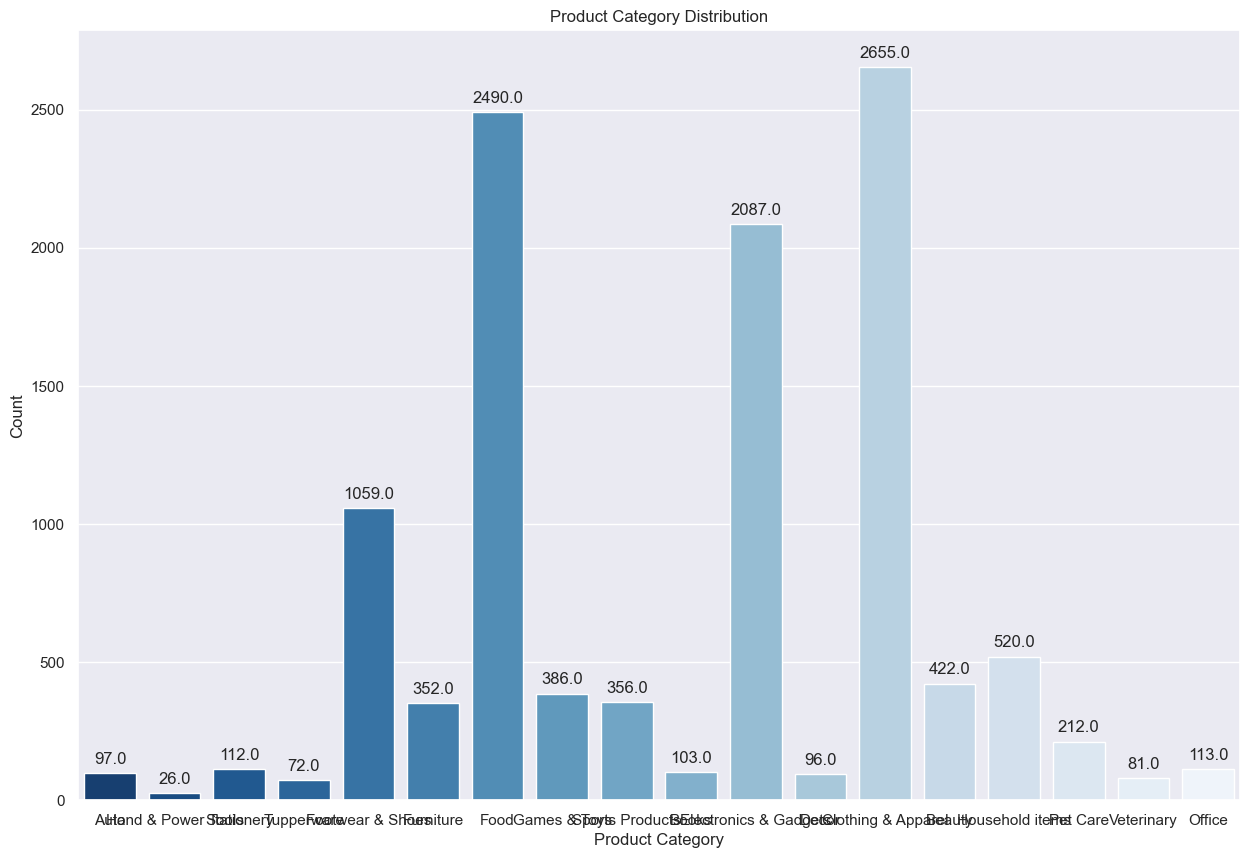

In [23]:
plt.figure(figsize=(15, 10))  
ax = sns.countplot(data=df, x='Product_Category', palette="Blues_r")

for bars in ax.patches:
    ax.annotate(f'{bars.get_height()}', (bars.get_x() + bars.get_width() / 2., bars.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()


## Top 10 most sold products

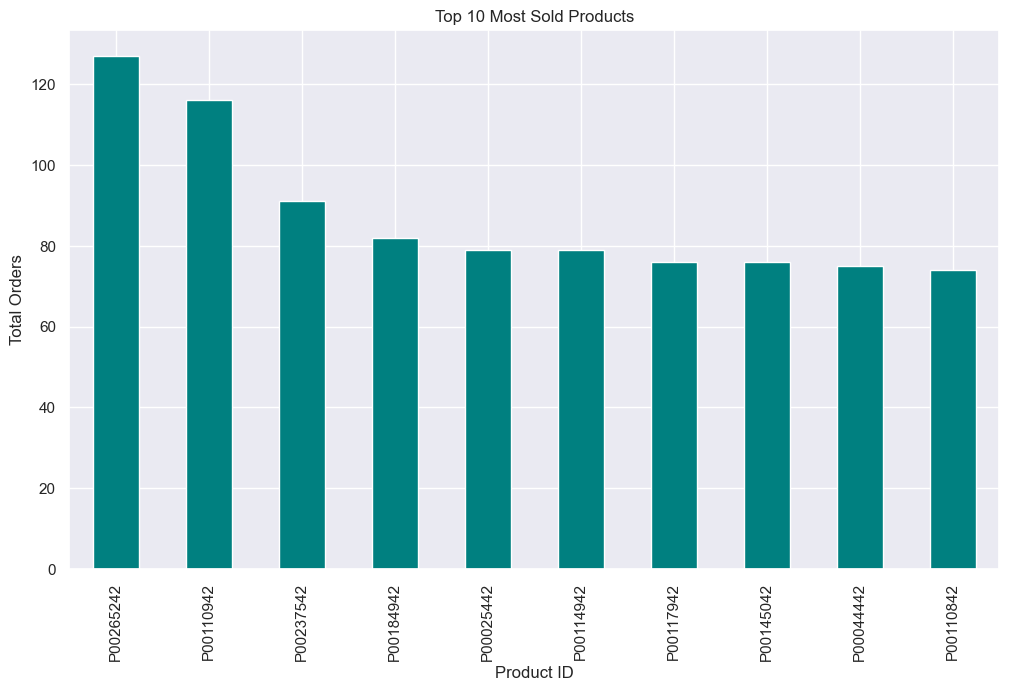

In [14]:
plt.figure(figsize=(12, 7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Top 10 Most Sold Products')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.show()

#### Gender Influence: The majority of buyers are females, indicating their significant purchasing power. Female buyers contribute more to the total sales amount compared to male buyers.

#### Age Group Insights: The age group between 26-35 years, especially females, constitutes the largest segment of buyers. This demographic shows the highest engagement in terms of both the number of purchases and the total sales amount.

#### Regional Preferences: Uttar Pradesh, Maharashtra, and Karnataka emerge as the top states contributing to the highest number of orders and total sales amount. These regions exhibit strong consumer demand and represent lucrative markets for the company.

#### Marital Status and Purchasing Power: Married individuals, particularly women, demonstrate a higher propensity to make purchases, indicating that family-oriented households play a significant role in driving sales during the Diwali period.

#### Occupational Patterns: Professionals working in the IT, Healthcare, and Aviation sectors are among the primary customers, indicating specific occupational preferences in consumer behavior.

#### Product Category Preferences: The Food, Clothing, and Electronics categories are the most popular among buyers. This suggests a diverse range of interests and needs among consumers during the festive season.

#### Top Selling Products: The top 10 most sold products represent a mix of various categories, highlighting the importance of offering a diverse product range to cater to different consumer preferences.